<a href="https://colab.research.google.com/github/Saumye13/Human_Detection-YOLO/blob/main/Human_Detection_(Drone)_YOLOv8n_Epoch_50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Human Detection (Drone)

YOLOv8 command line interface (CLI) was used.

Cells with Python SDK code were not run.

In [ ]:
# Check for GPU Access

!nvidia-smi


/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
# Import os and set path to Home directory

import os

HOME = os.getcwd()
print(HOME)


/content


In [ ]:
# Install ultralytics and YOLOv8

# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (AMD EPYC 7B12)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/107.7 GB disk)


In [ ]:
# Git Clone method

%cd {HOME}
!git clone github.com/ultralytics/ultralytics
%cd {HOME}/ultralytics
!pip install -e .

from IPython import Image, display
display.clear_output()

import ultralytics
ultralytics.checks()

In [ ]:
# Import YOLO from ultralytics

from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
# CLI

!yolo task = detect model = yolov8n.pt mode = predict source = 'https://media.roboflow.com/notebooks/examples/dog.jpeg' save = False

100% 6.23M/6.23M [00:00<00:00, 81.5MB/s]
Ultralytics YOLOv8.0.228 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

100% 104k/104k [00:00<00:00, 45.1MB/s]
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 425.4ms
Speed: 21.4ms preprocess, 425.4ms inference, 32.7ms postprocess per image at shape (1, 3, 640, 384)
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [ ]:
# Display the Predictions made on the Source Image

%cd {HOME}
Image(filename = '', height = 1000)

In [ ]:
# Python SDK

model = YOLO(f'{HOME}/yolov8n.pt')
results = model.predict(source = 'https://media.roboflow.com/notebooks/examples/dog.jpeg', conf = 0.25, save = False)



Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 241.0ms
Speed: 4.4ms preprocess, 241.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 384)


In [ ]:
# Display the Prdeictions made on the Source Image

%cd {HOME}
Image(filename = '', height = 1000)

In [ ]:
# Display the Details of the First Prediction made on the Source Image

results[0].boxes.xyxy


tensor([[   0.0000,  314.4716,  625.0755, 1278.1947],
        [  55.1730,  250.0220,  648.1080, 1266.2720],
        [ 633.2291,  719.5391,  701.0538,  786.0336]])

In [ ]:
results[0].boxes.conf

tensor([0.7271, 0.2907, 0.2846])

In [ ]:
results[0].boxes.cls

tensor([ 0., 16.,  2.])

In [ ]:
# Create a new directory datasets

!mkdir {HOME}/datasets
%cd {HOME}/datasets

/content/datasets


In [ ]:
# Install roboflow

# !pip install roboflow

!pip install roboflow --quiet

from roboflow import Roboflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.9/69.9 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


In [ ]:
# Export the Custom Dataset stored in Roboflow account

# rf = Roboflow(api_key="eWZWQiyOa5iQnnwIJmdG")
# project = rf.workspace("human-detection-b4c9z").project("human-detection-drone-4jxmz")
# dataset = project.version(1).download("yolov8")

rf = Roboflow(api_key="eWZWQiyOa5iQnnwIJmdG")
project = rf.workspace("human-detection-b4c9z").project("human-detection-drone-4jxmz")
dataset = project.version(2).download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Human-Detection-Drone-2 in yolov8:: 100%|██████████| 1312/1312 [00:00<00:00, 6279.53it/s]


In [ ]:
print(dataset.location)

/content/datasets/Human-Detection-Drone-2


In [ ]:
!ls {HOME}/datasets

Human-Detection-Drone-2


In [ ]:
!pip install -U ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 699.8/699.8 kB 5.0 MB/s eta 0:00:00
  Attempting uninstall: ultralytics
    Found existing installation: ultralytics 8.0.196
    Uninstalling ultralytics-8.0.196:
      Successfully uninstalled ultralytics-8.0.196


In [ ]:
# Custom Training - CLI

%cd {HOME}

# !yolo task = detect mode = train model = yolov8n.pt data = {dataset.location}/data.yaml epochs = 50 imgsz = 640 plots = True

!yolo task = detect mode = train model = yolov8n.pt data = '/content/datasets/Human-Detection-Drone-2/data.yaml' epochs = 50 imgsz = 640 plots = True


/content
100% 6.23M/6.23M [00:00<00:00, 77.9MB/s]
Ultralytics YOLOv8.1.1 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (AMD EPYC 7B12)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/datasets/Human-Detection-Drone-2/data.yaml, epochs=50, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_con

In [ ]:
# Custom Training - Python SDK

%cd {HOME}

train_model = YOLO(f'{HOME}/yolov8n.pt')
train_results = train_model.train(data = {dataset.location}/data.yaml, epochs = 50, imgsz = 640, plots = True)


/content


NameError: ignored

In [ ]:
# List the files in directory train

!ls {HOME}/runs/detect/train/


args.yaml					   P_curve.png		train_batch1521.jpg
confusion_matrix_normalized.png			   PR_curve.png		train_batch1522.jpg
confusion_matrix.png				   R_curve.png		train_batch1.jpg
events.out.tfevents.1705352007.d74bb62a89b2.916.0  results.csv		train_batch2.jpg
F1_curve.png					   results.png		val_batch0_labels.jpg
labels_correlogram.jpg				   train_batch0.jpg	val_batch0_pred.jpg
labels.jpg					   train_batch1520.jpg	weights


/content


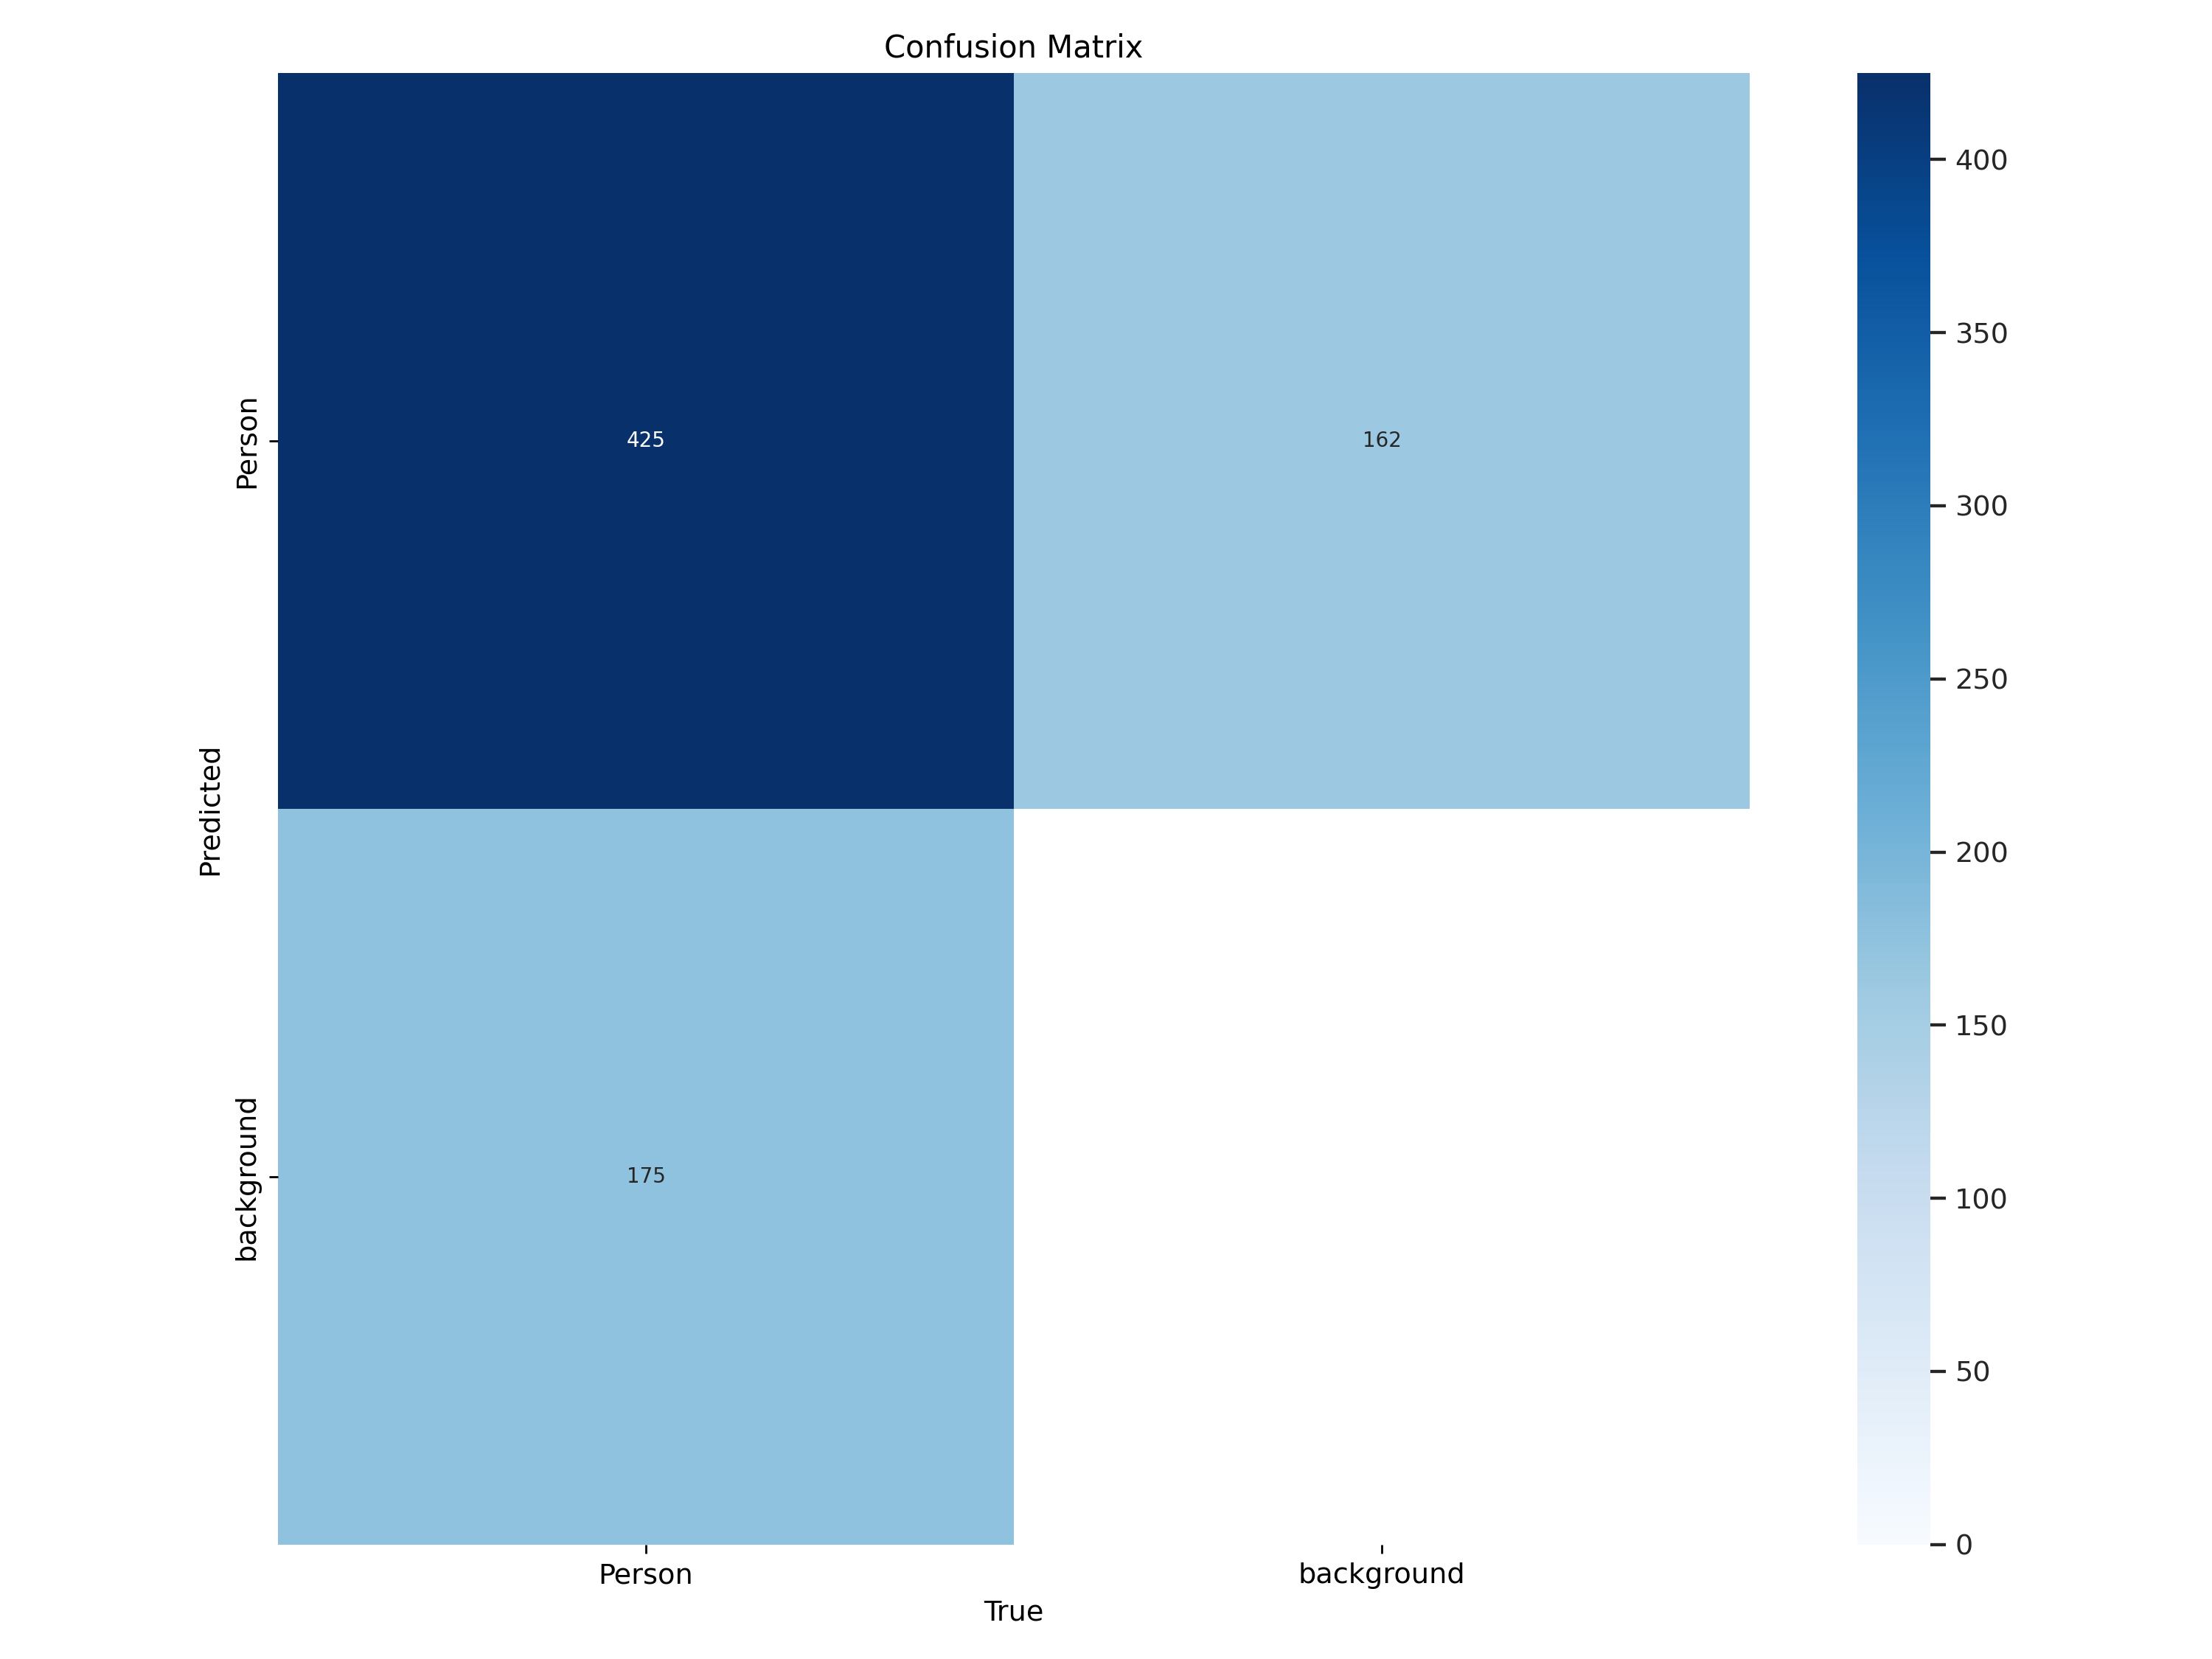

In [ ]:
# Display the Confusion Matrix

%cd {HOME}
Image(filename = f'{HOME}/runs/detect/train/confusion_matrix.png', width = 1000)


/content


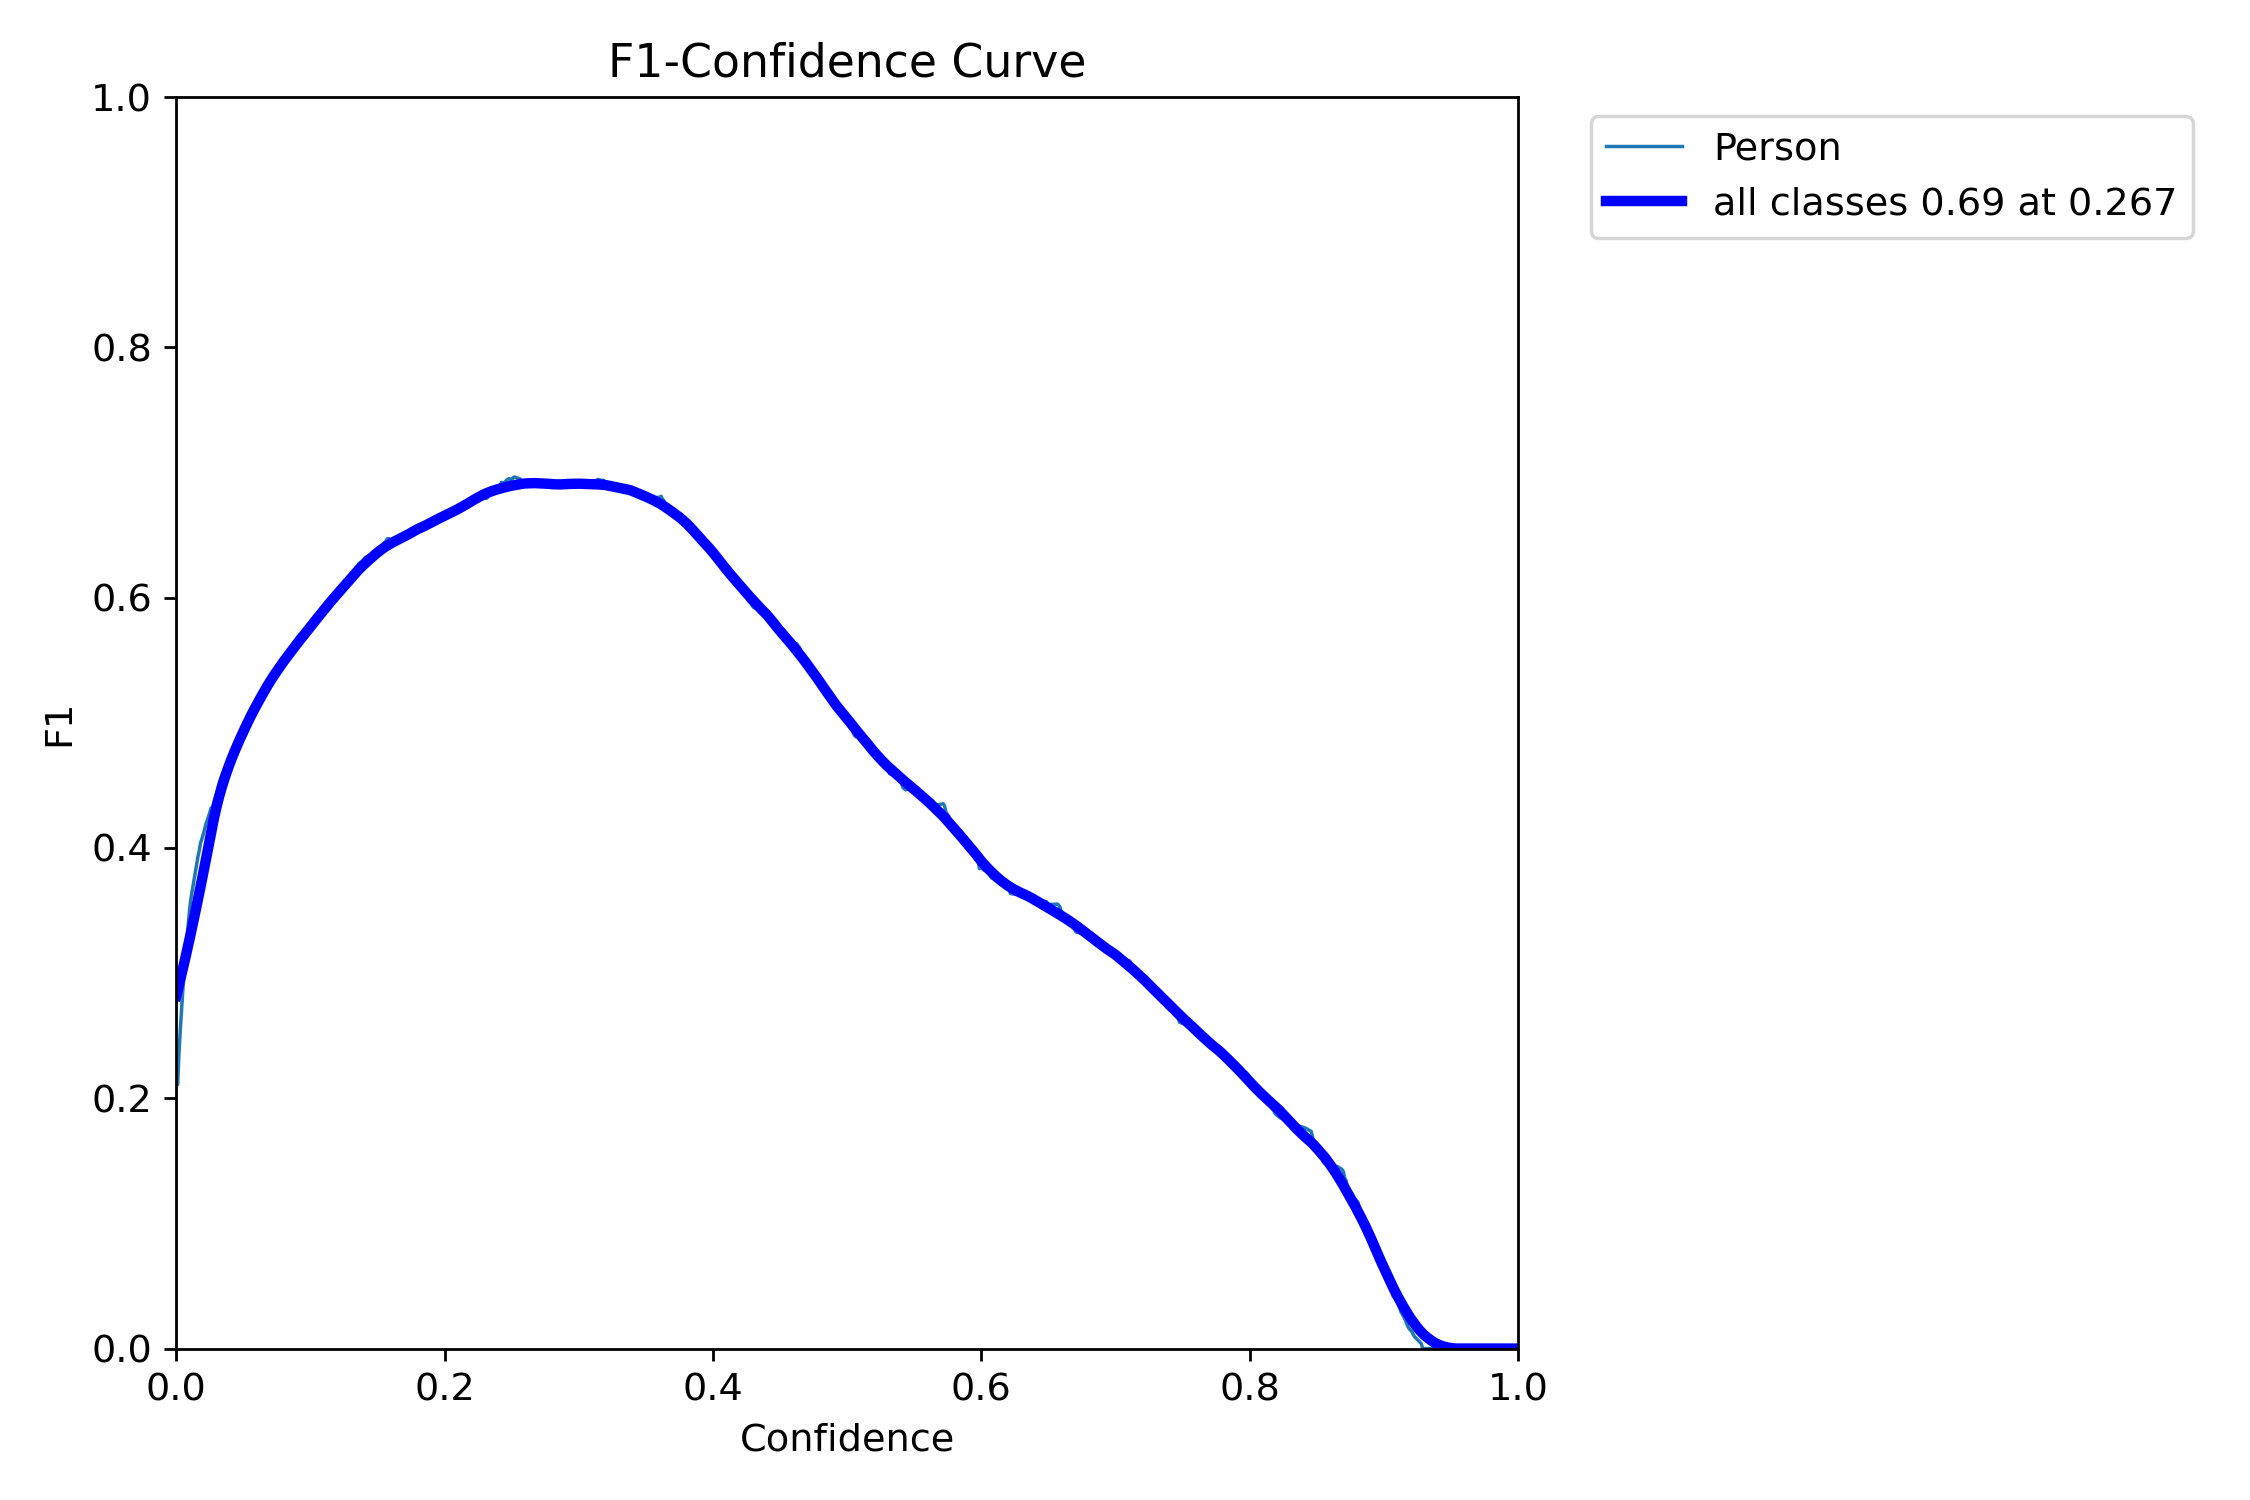

In [ ]:
# Display the F1-Confidence Curve

%cd {HOME}

Image(filename = f'{HOME}/runs/detect/train/F1_curve.png', width = 1000)


/content


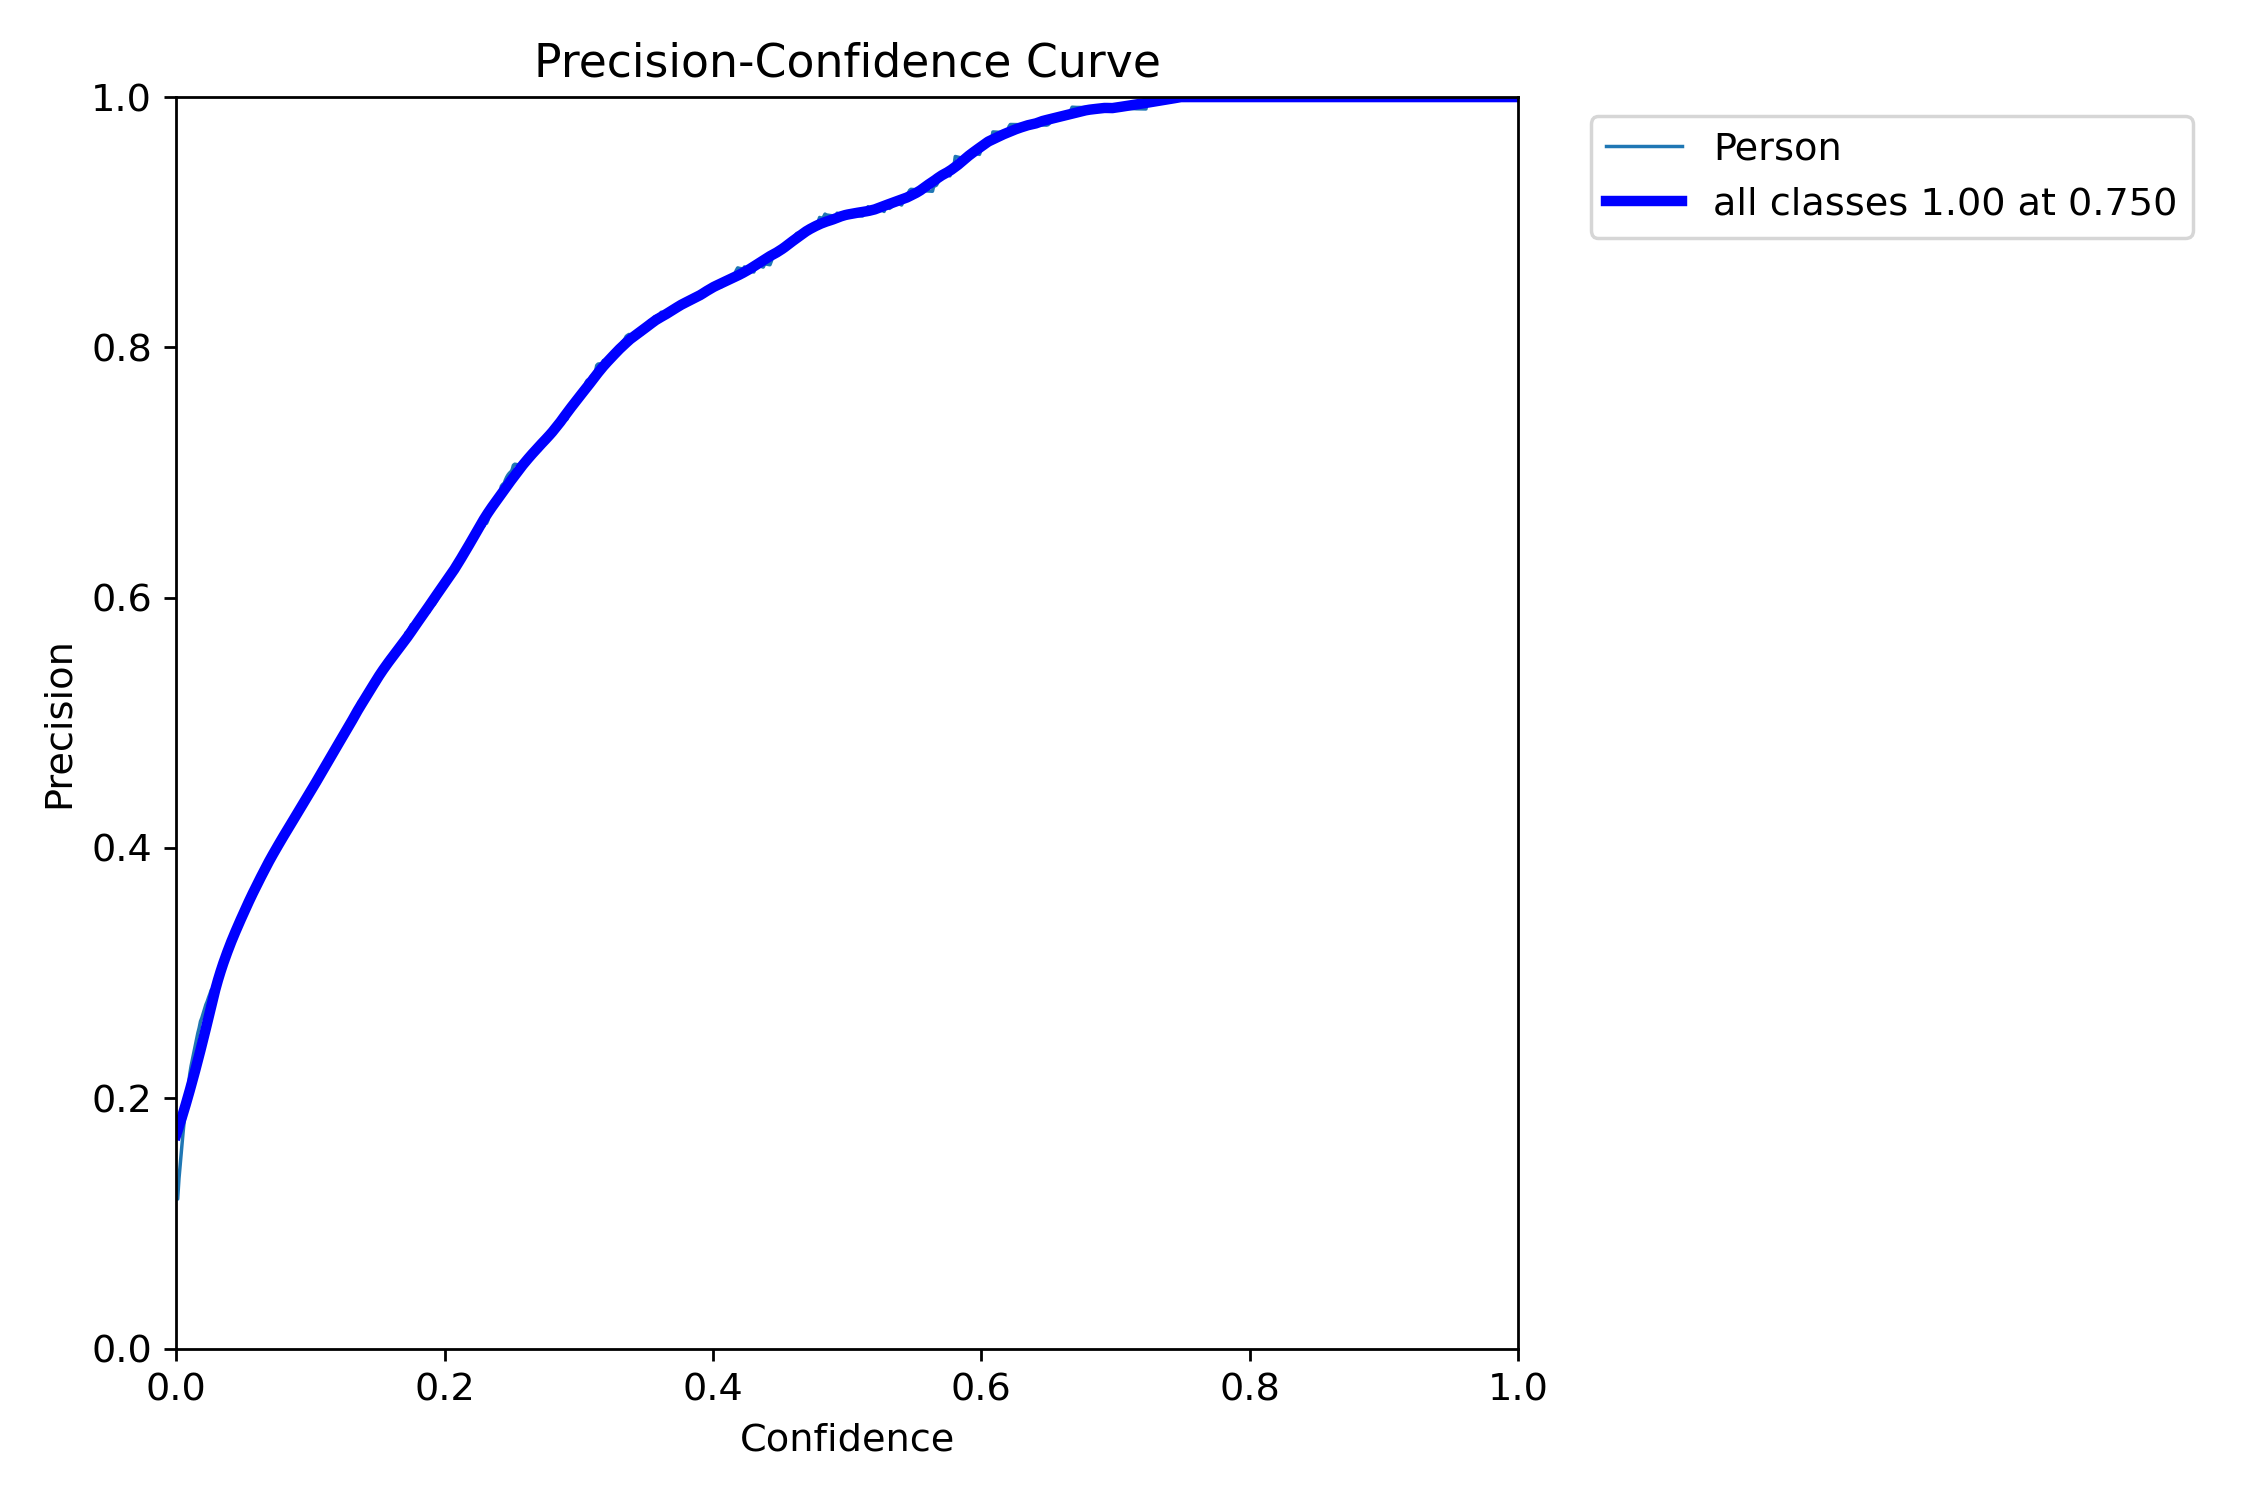

In [ ]:
# Display the Precision-Confidence Curve

%cd {HOME}

Image(filename = f'{HOME}/runs/detect/train/P_curve.png', width = 1000)


/content


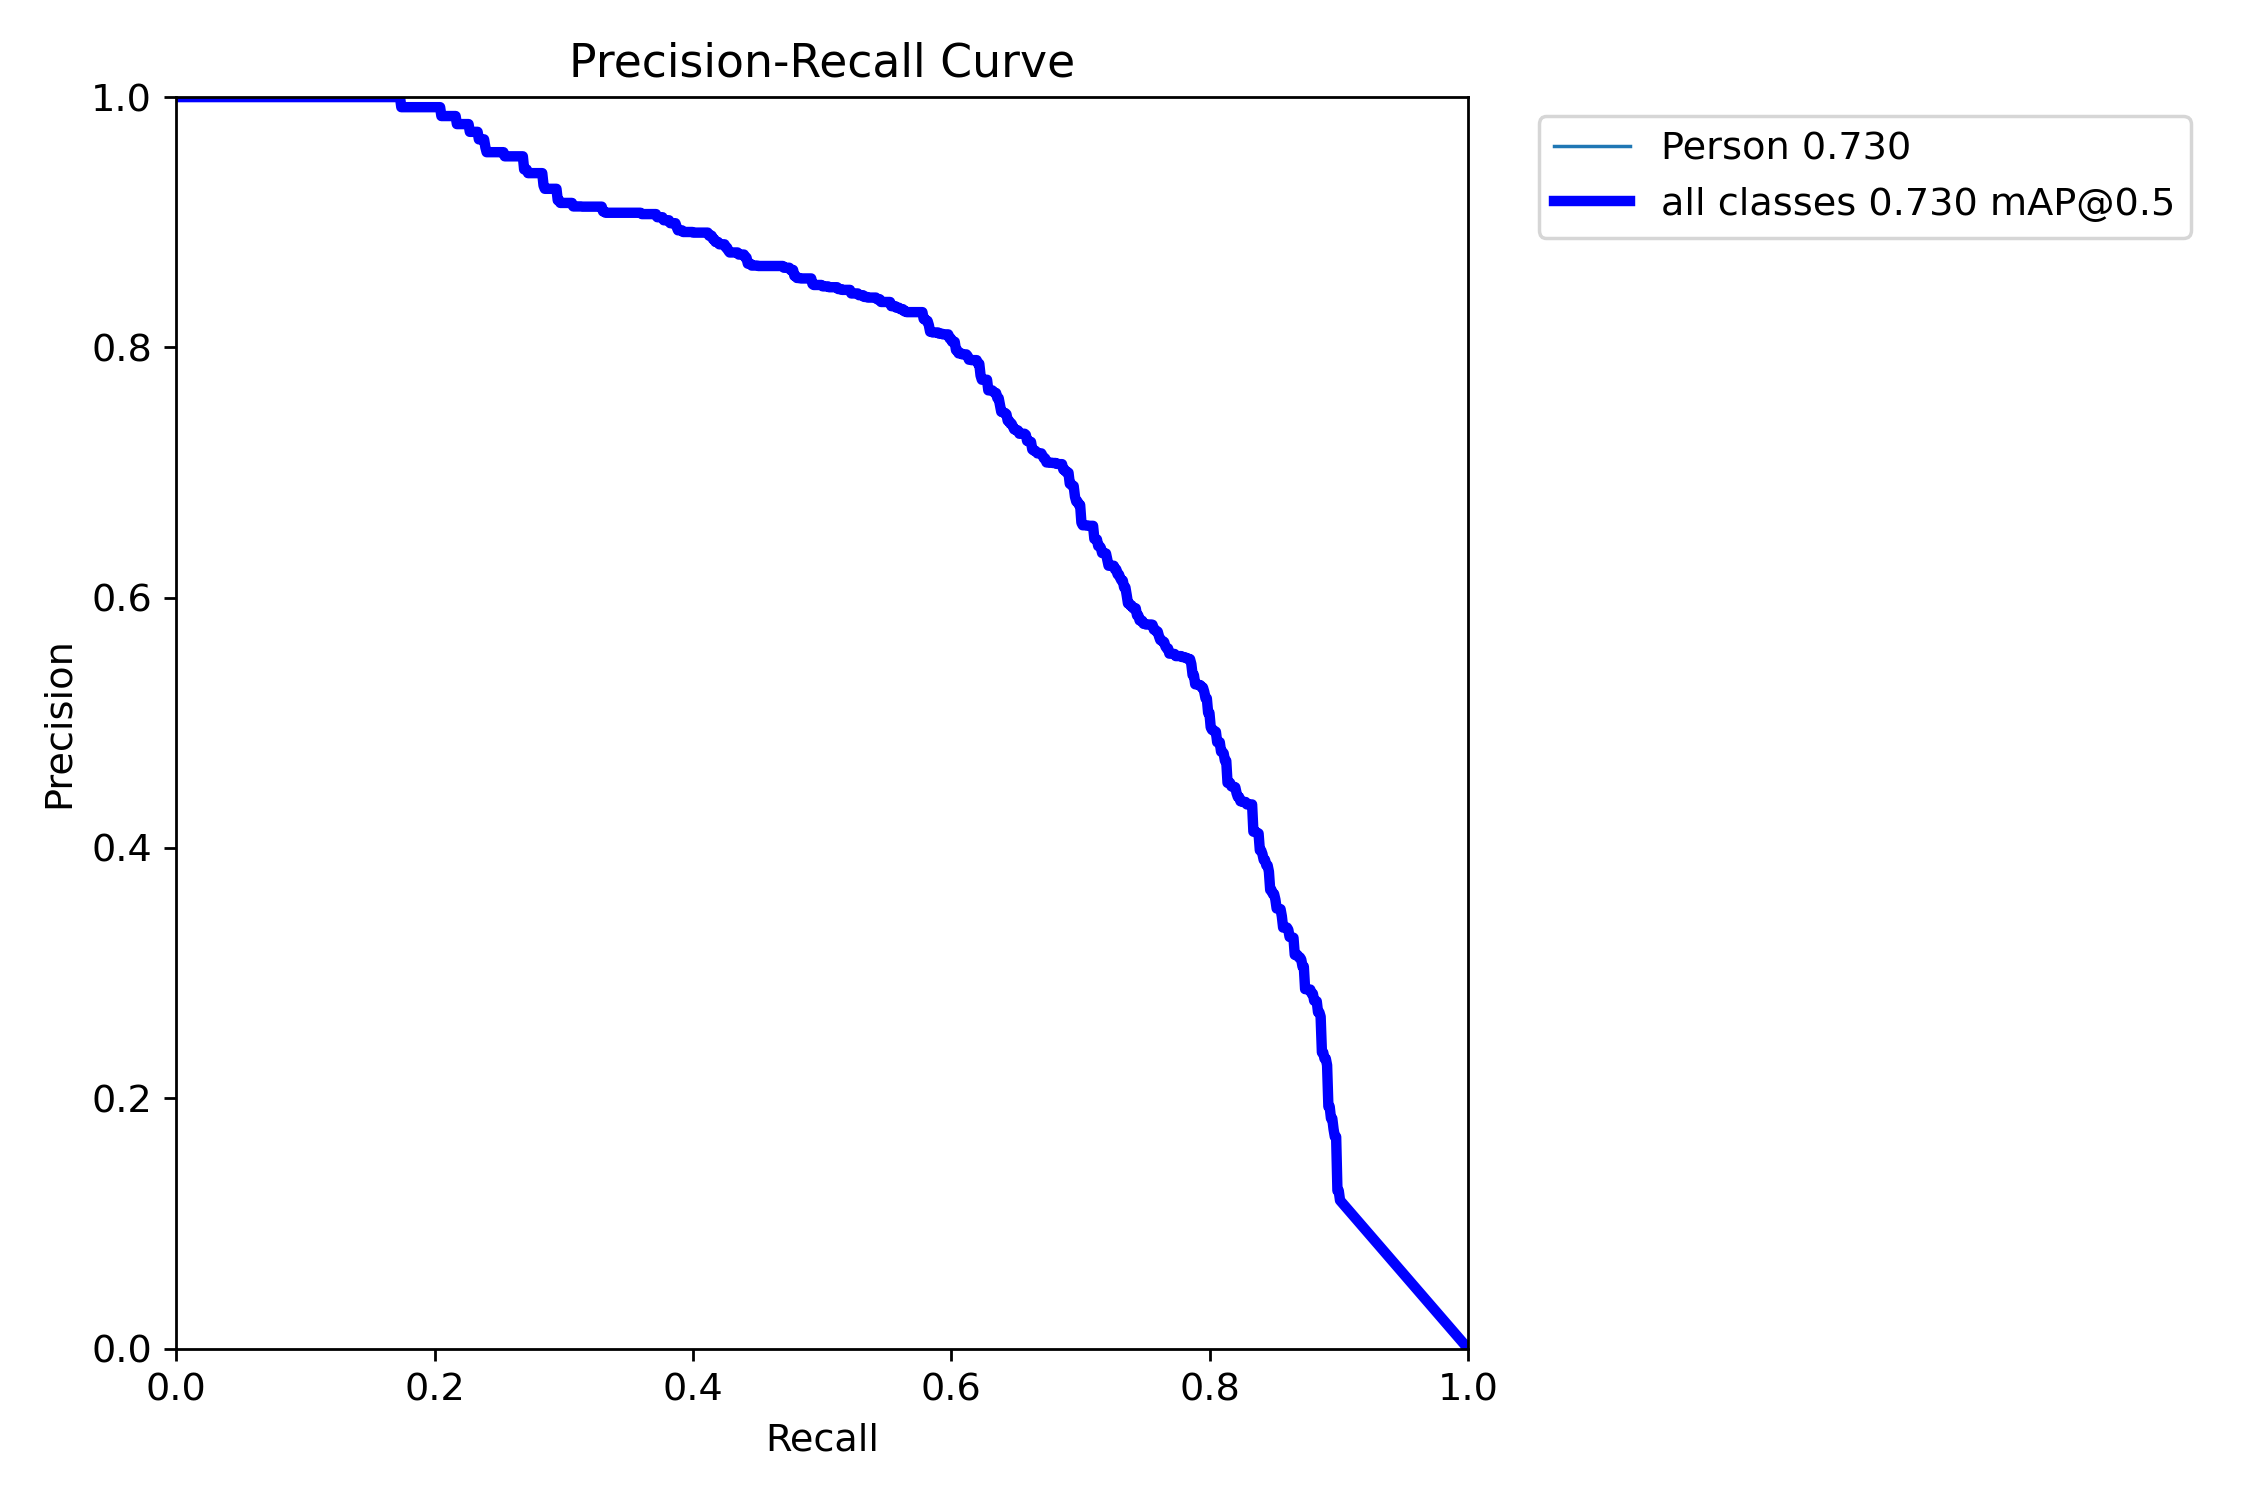

In [ ]:
# Display the Prceision-Recall Curve

%cd {HOME}

Image(filename = f'{HOME}/runs/detect/train/PR_curve.png', width = 1000)


/content


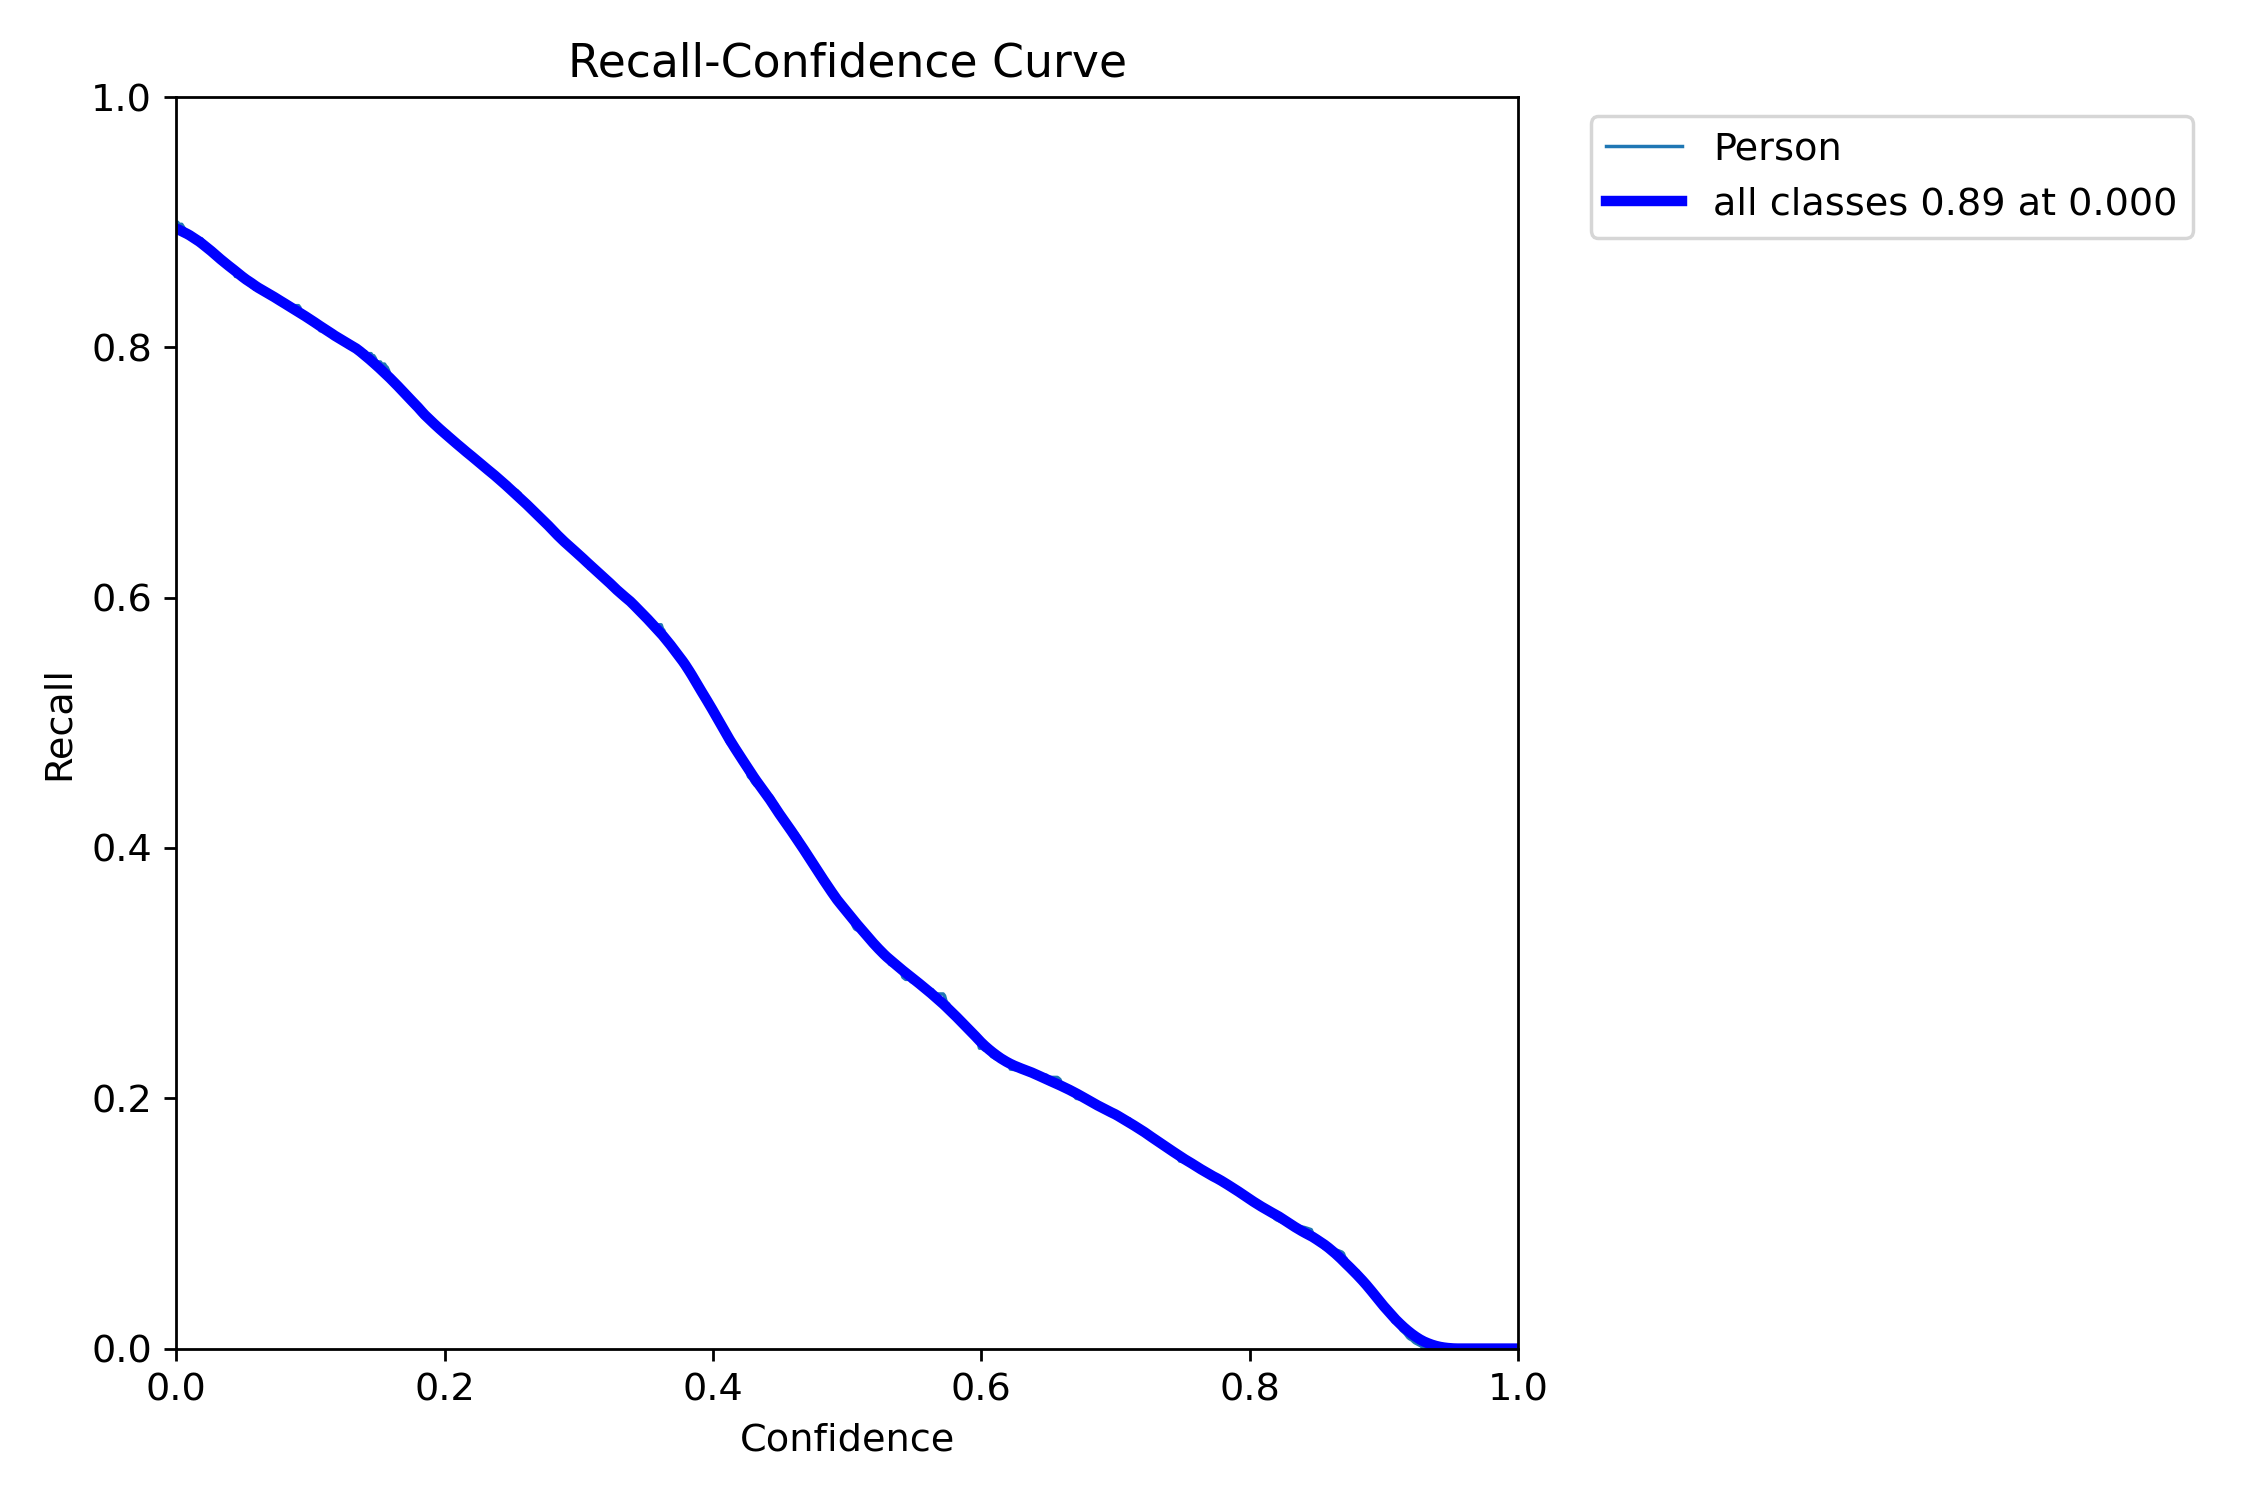

In [ ]:
# Display the Recall-Confidence Curve

%cd {HOME}

Image(filename = f'{HOME}/runs/detect/train/R_curve.png', width = 1000)


/content


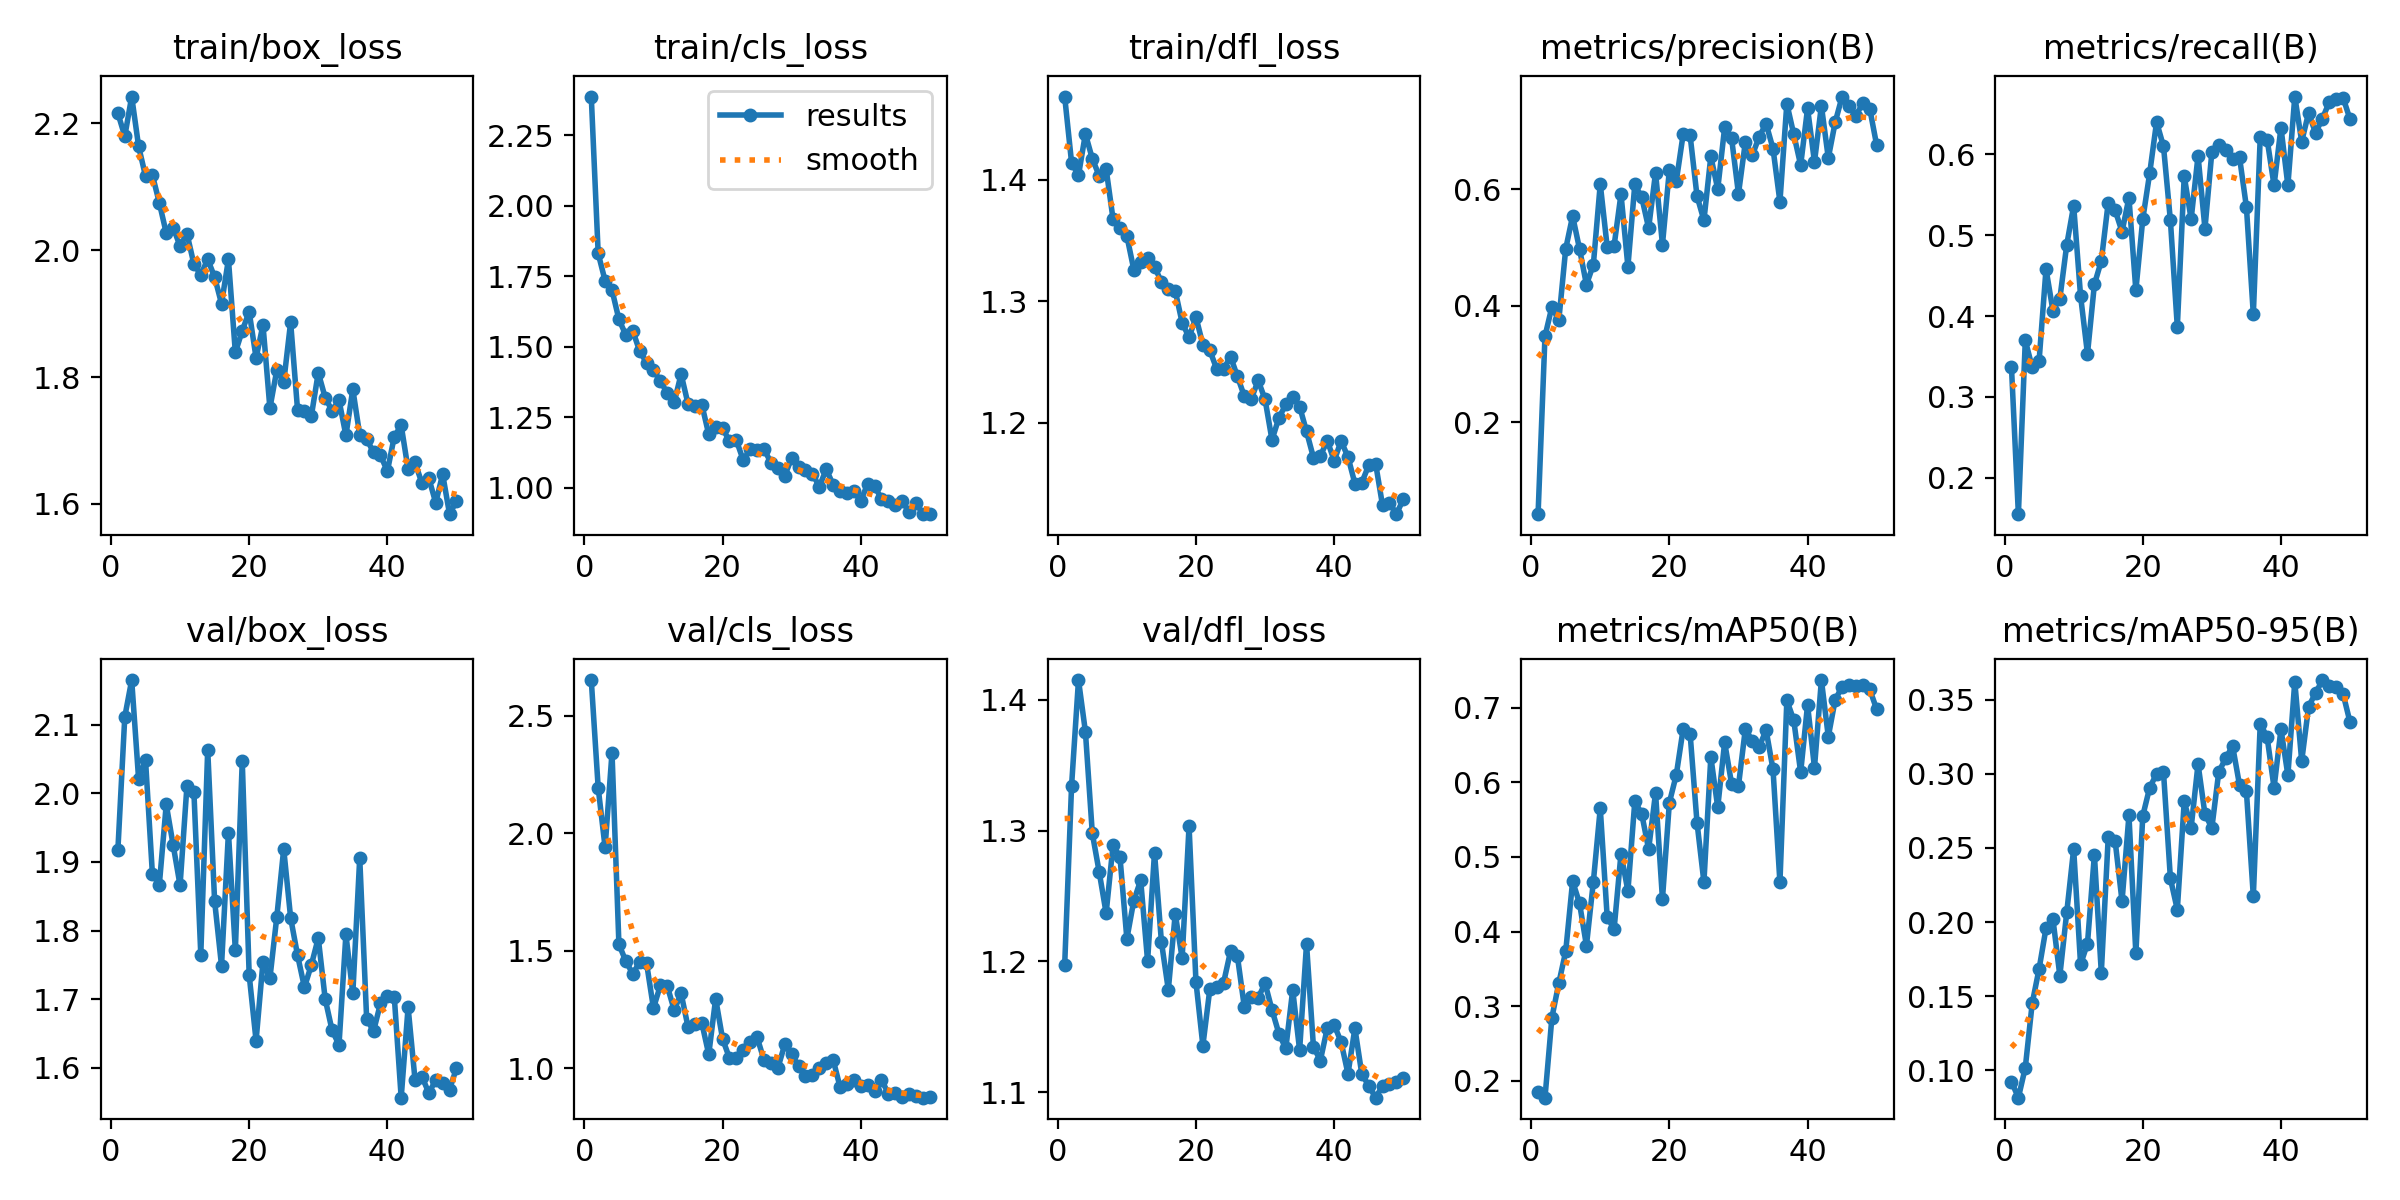

In [ ]:
# Display the Results

%cd {HOME}

Image(filename = f'{HOME}/runs/detect/train/results.png', width = 1000)


/content


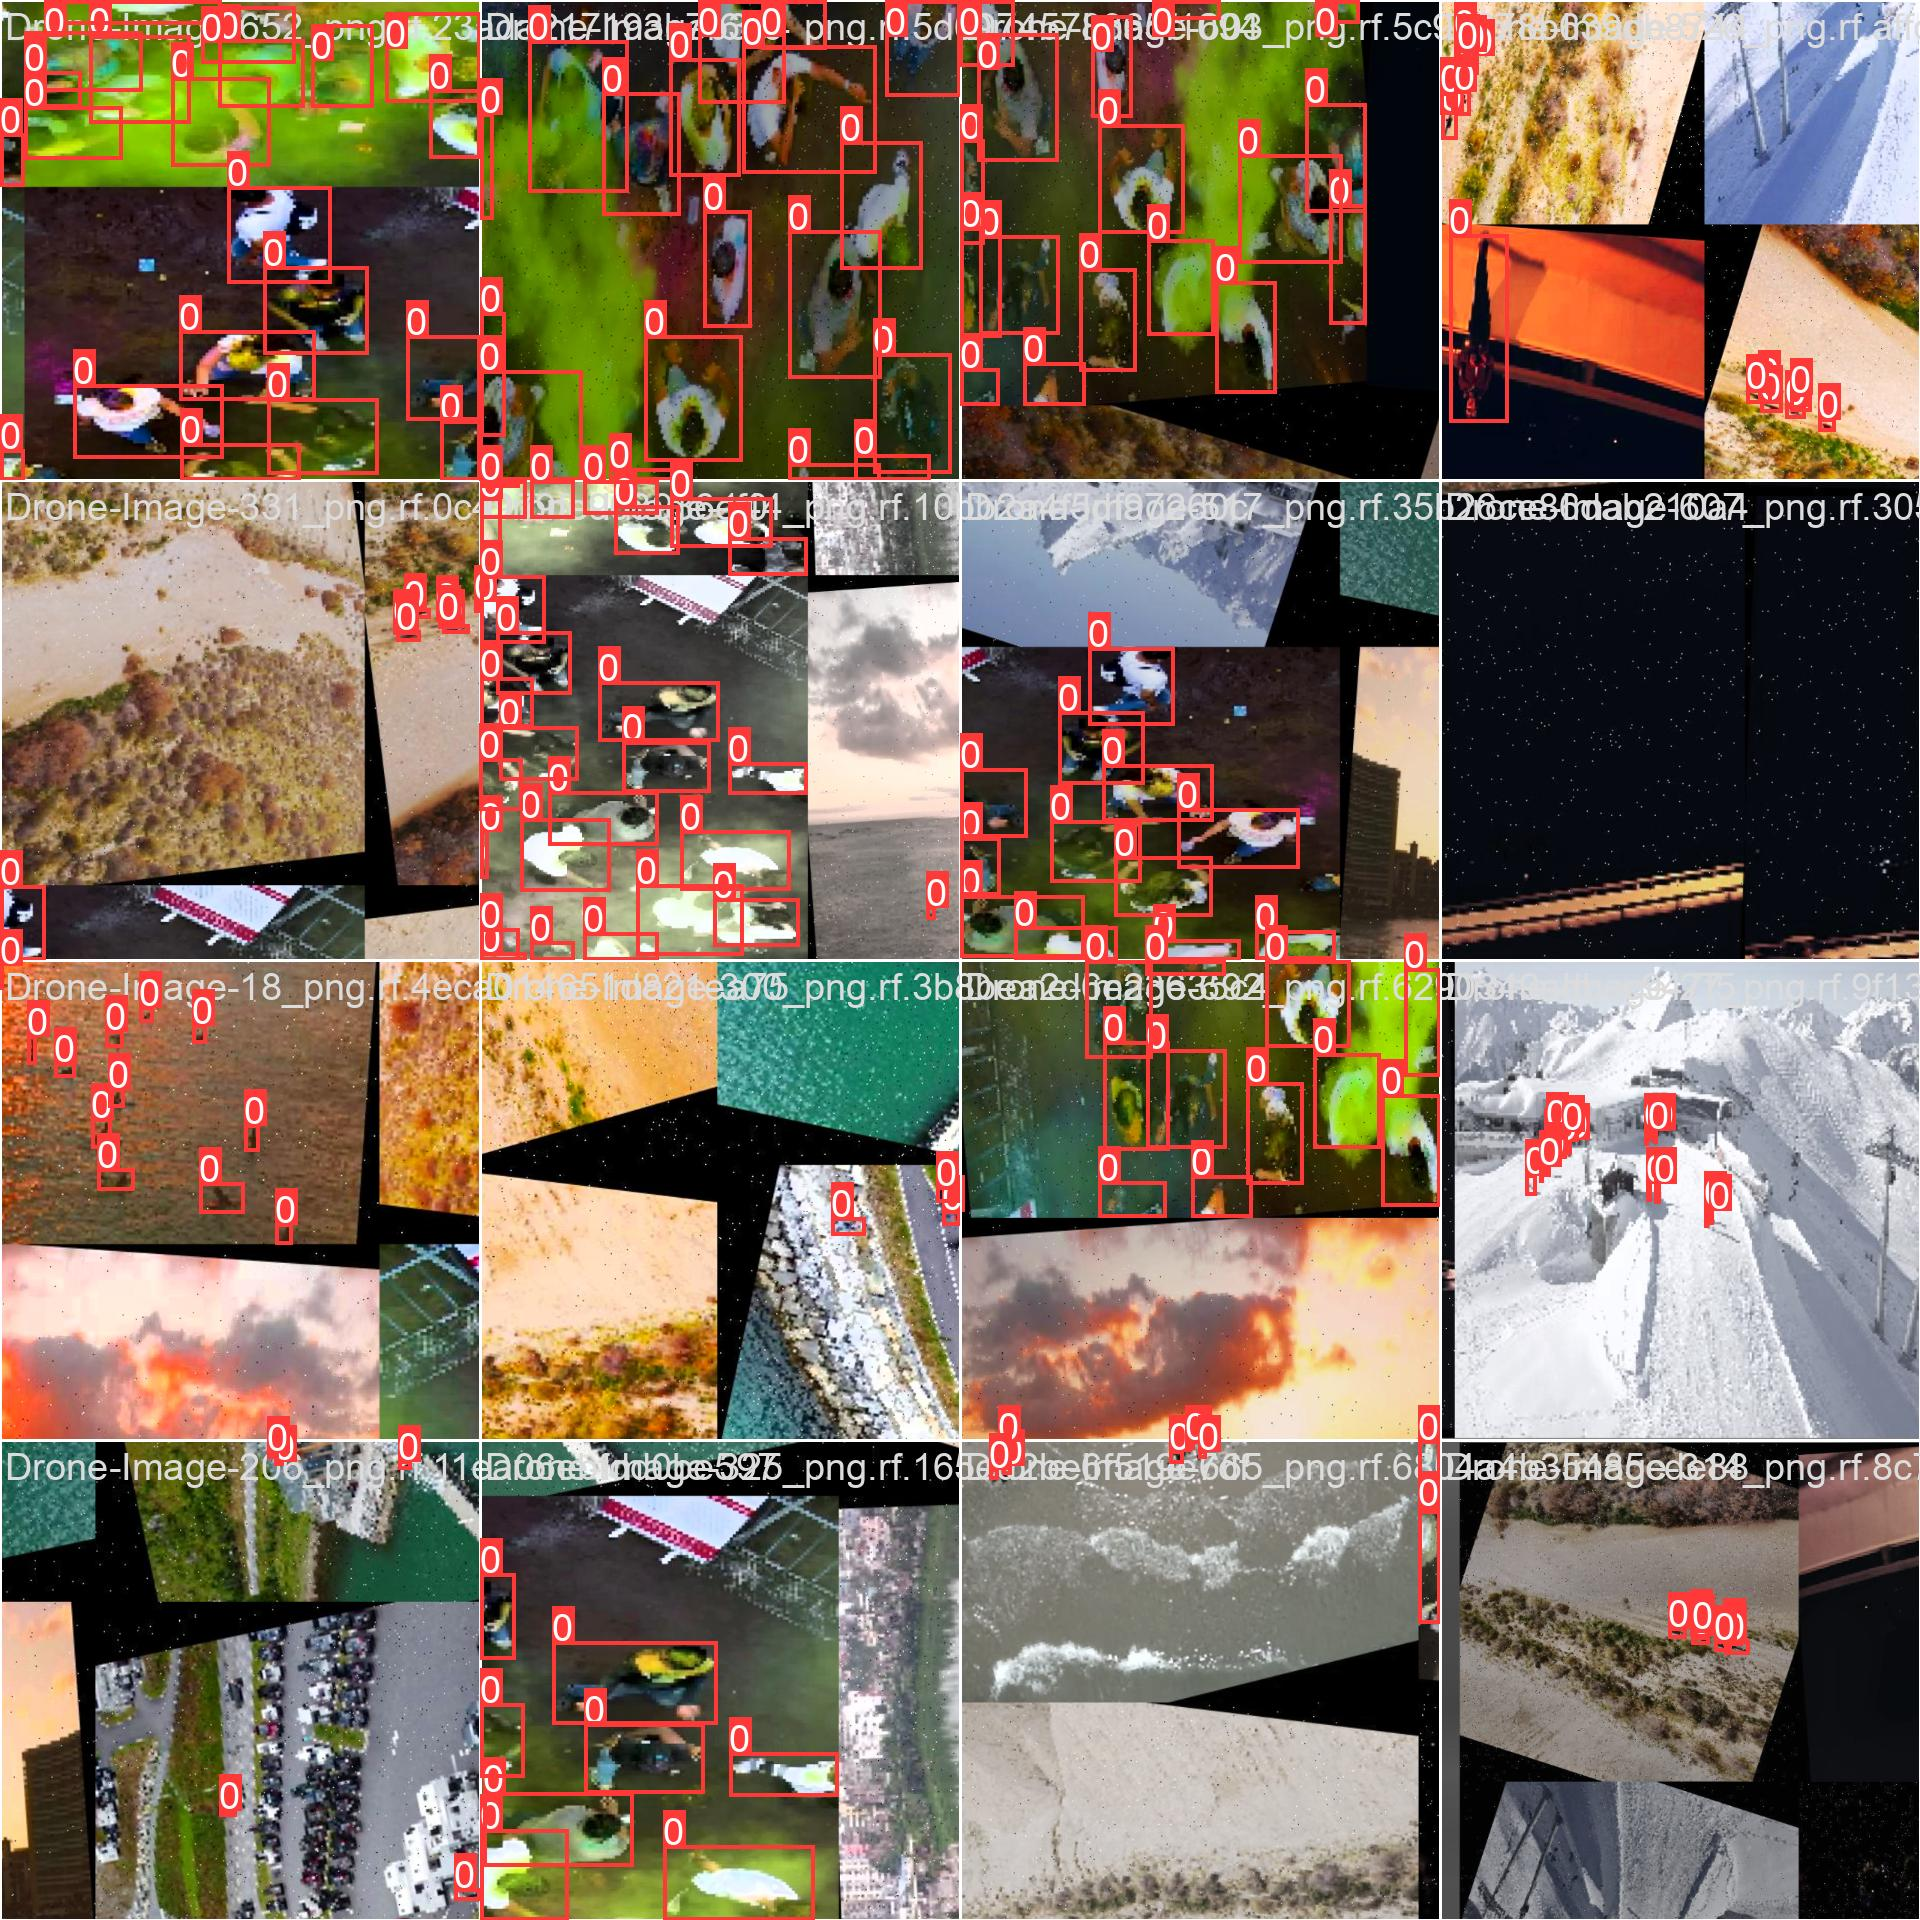

In [ ]:
# Display the Images part of Batch 0 of the Training Set

%cd {HOME}

Image(filename = f'{HOME}/runs/detect/train/train_batch0.jpg', width = 1000)


In [ ]:
# Display the Images part of Batch 451 of the Training Set

%cd {HOME}

Image(filename = f'{HOME}/runs/detect/train/train_batch451.jpg', width = 1000)


/content


FileNotFoundError: [Errno 2] No such file or directory: '/content/runs/detect/train/train_batch451.jpg'

In [ ]:
# Display the Predictions made on the Images part of Batch 0 of the Validation Set

%cd {HOME}

Image(filename = f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width = 1000)


In [ ]:
# Display the Images part of Batch 0 of the Validation Set with their Actual Labels

%cd {HOME}

Image(filename = f'{HOME}/runs/detect/train/val_batch0_labels.jpg', width = 1000)


In [ ]:
# Validate the Custom Model - CLI

%cd {HOME}

!yolo task = detect model = {HOME}/runs/detect/train/weights/best.pt mode = val data = {dataset.location}/data.yaml


In [ ]:
# Validate the Custom Model - Python SDK

%cd {HOME}

val_model = YOLO(f'{HOME}/runs/detect/train/weights/best.pt')
val_results = val_model.val(data = {dataset.location}/data.yaml)


In [ ]:
# Inference with Custom Model - CLI

%cd {HOME}

!yolo task = detect model = {HOME}/runs/detect/train/weights/best.pt mode = predict conf = 0.25 source = {dataset.location}/test/images save = True


In [ ]:
# Inference with Custom Model - Python SDK

inference_model = YOLO(f'{HOME}/runs/detect/train/weights/best.pt')
inference_results = inference_model.predict(source = {dataset.location}/test/images, conf = 0.25, save = True)

In [ ]:
# Display some of the Resultant Images

import glob
from IPython.display import Image, display

In [ ]:
for image_path in glob.glob(f'{HOME}/runs/detect/predict3/*.jpg')[ : 20]:
    display(Image(filename = image_path, width = 600))
    print("\n")